# 1. Exploratory Data Analysis (EDA)

##  Load the dataset and perform EDA

In [15]:
import pandas as pd
dataset = pd.read_csv("Hitters.csv", header=0, index_col=None)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

**Features Present**

Features and their descriptions and types (Salary is the column to be predicted):

1. AtBat: Number of times at bat (numerical)
2. Hits: Number of hits (numerical)
3. HmRun: Number of home runs (numerical)
4. Runs: Number of runs in (numerical)
5. RBI: Number of runs batted (numerical)
6. Walks: Number of walks (numerical)
7. Years: Number of years in the major leagues (numerical)
8. CAtBat: Number of times at bat during his career (numerical)
9. CHits: Number of hits during his career (numerical)
0. CHmRun: Number of home runs during his career (numerical)
1. CRuns: Number of runs during his career (numerical)
2. CRBI: Number of runs batted in during his career (numerical)
3. CWalks: Number of walks during his career (numerical)
4. League: A factor with levels A and N indicating player’s league (categorical)
5. Division: A factor with levels E and W indicating player’s division (categorical)
6. PutOuts: Number of put outs (numerical)
7. Assists: Number of assists (numerical)
8. Errors: Number of errors (numerical)
9. Salary: Annual salary on opening day in thousands of dollars (numerical)
0. NewLeague: A factor with levels A and N indicating player’s league (categorical)

### Checking for Null Values in the Dataset

In [16]:
dataset.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

**Inference**: Only the *Salary* field contains Null Values, which make up 18% of all samples. Thus, we do not drop Null values, instead we fill them with its mean.

### Filling Null Values with Mean

In [17]:
dataset['Salary'].fillna(value=dataset['Salary'].mean(skipna=True), inplace=True)

### Description of Numerical Columns

In [18]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.500000,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.000000,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.000000,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.000000,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.000000,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.000000,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.000000,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.000000,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.000000,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.500000,90.00,548.0


### Exploring Categorical Features

#### Effect on Target Value

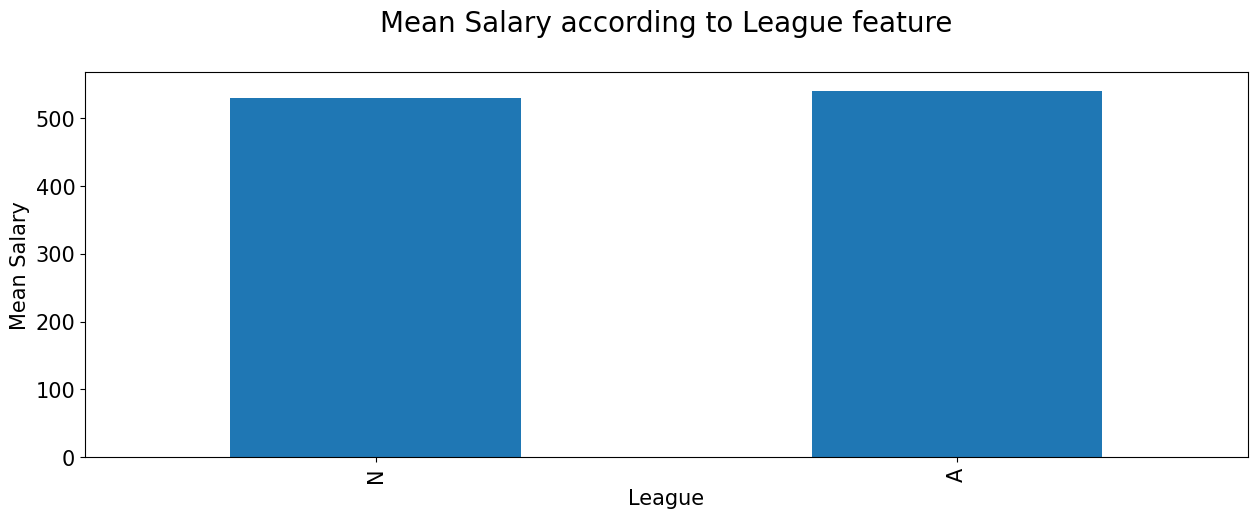

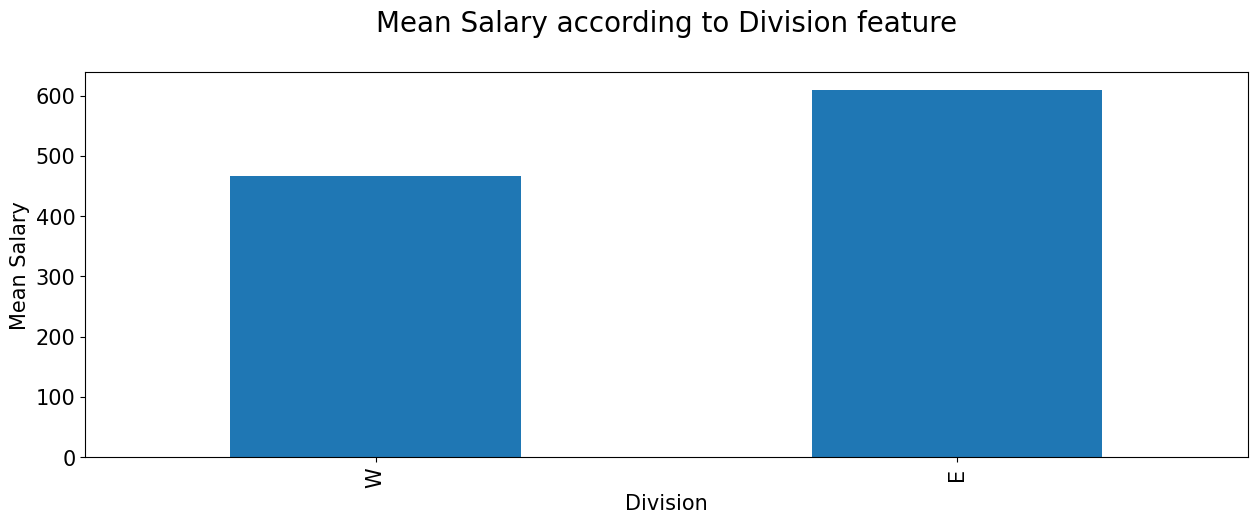

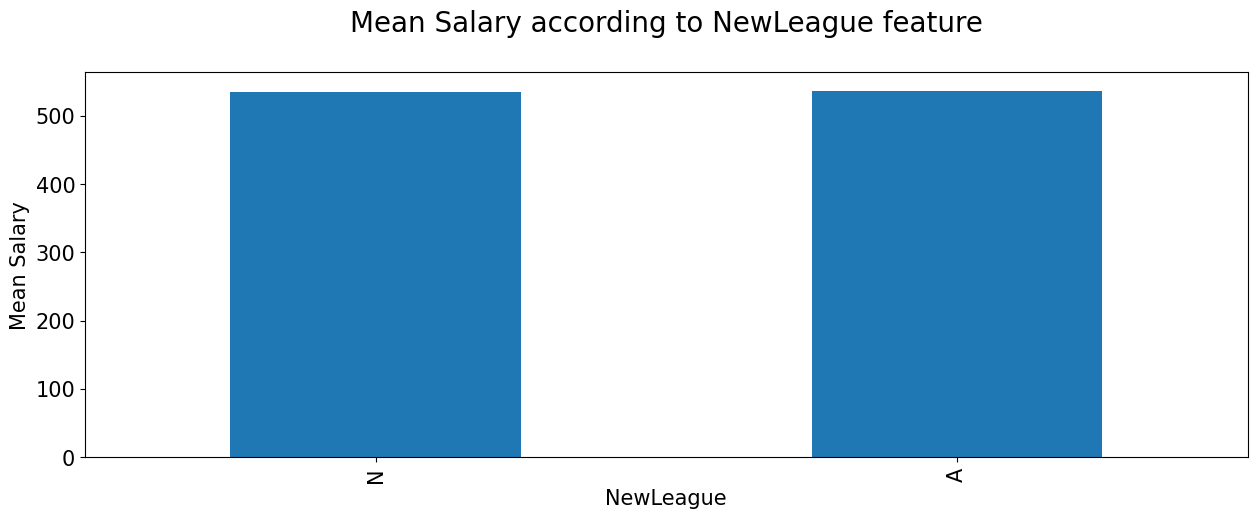

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def explore_categorical_feature(feature):
  group = dataset.groupby(feature)
  plt.figure(figsize=[15,5])
  group['Salary'].mean().sort_values().plot(kind = 'bar', fontsize=15)
  plt.xlabel(feature, fontsize=15)
  plt.ylabel('Mean Salary', fontsize=15)
  plt.title("Mean Salary according to {} feature\n".format(feature), fontsize=20)
  plt.show()
for feature in dataset.select_dtypes(exclude=np.number):
  explore_categorical_feature(feature)

**Inference**: We see that *League* and *NewLeague* have negligible effect on the variable we have to predict. Thus, we drop them.

In [20]:
dataset = dataset.drop(['League', 'NewLeague'], axis = 1)

#### Frequency Counts

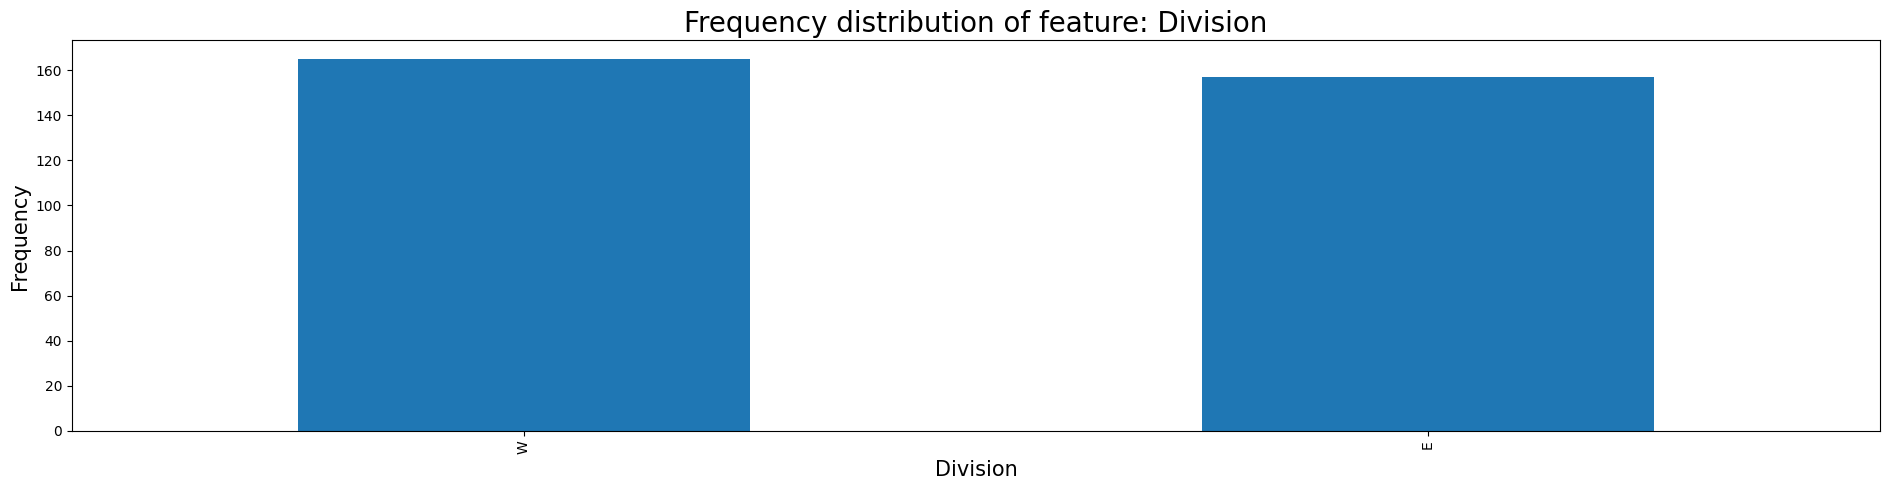

In [21]:
plt.figure(figsize=(19,5))
dataset.groupby('Division')['Division'].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature: "+'Division', fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel('Division', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Inference**: We should not remove Division from the data.

### Exploring Numerical Features

#### Correlation Table

In [22]:
dataset[dataset.describe().columns].corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.342474
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.384974
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.311615
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.372257
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.401647
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.402465
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.352235
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.467636
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.491152
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.451876


#### Correlation Heatmap

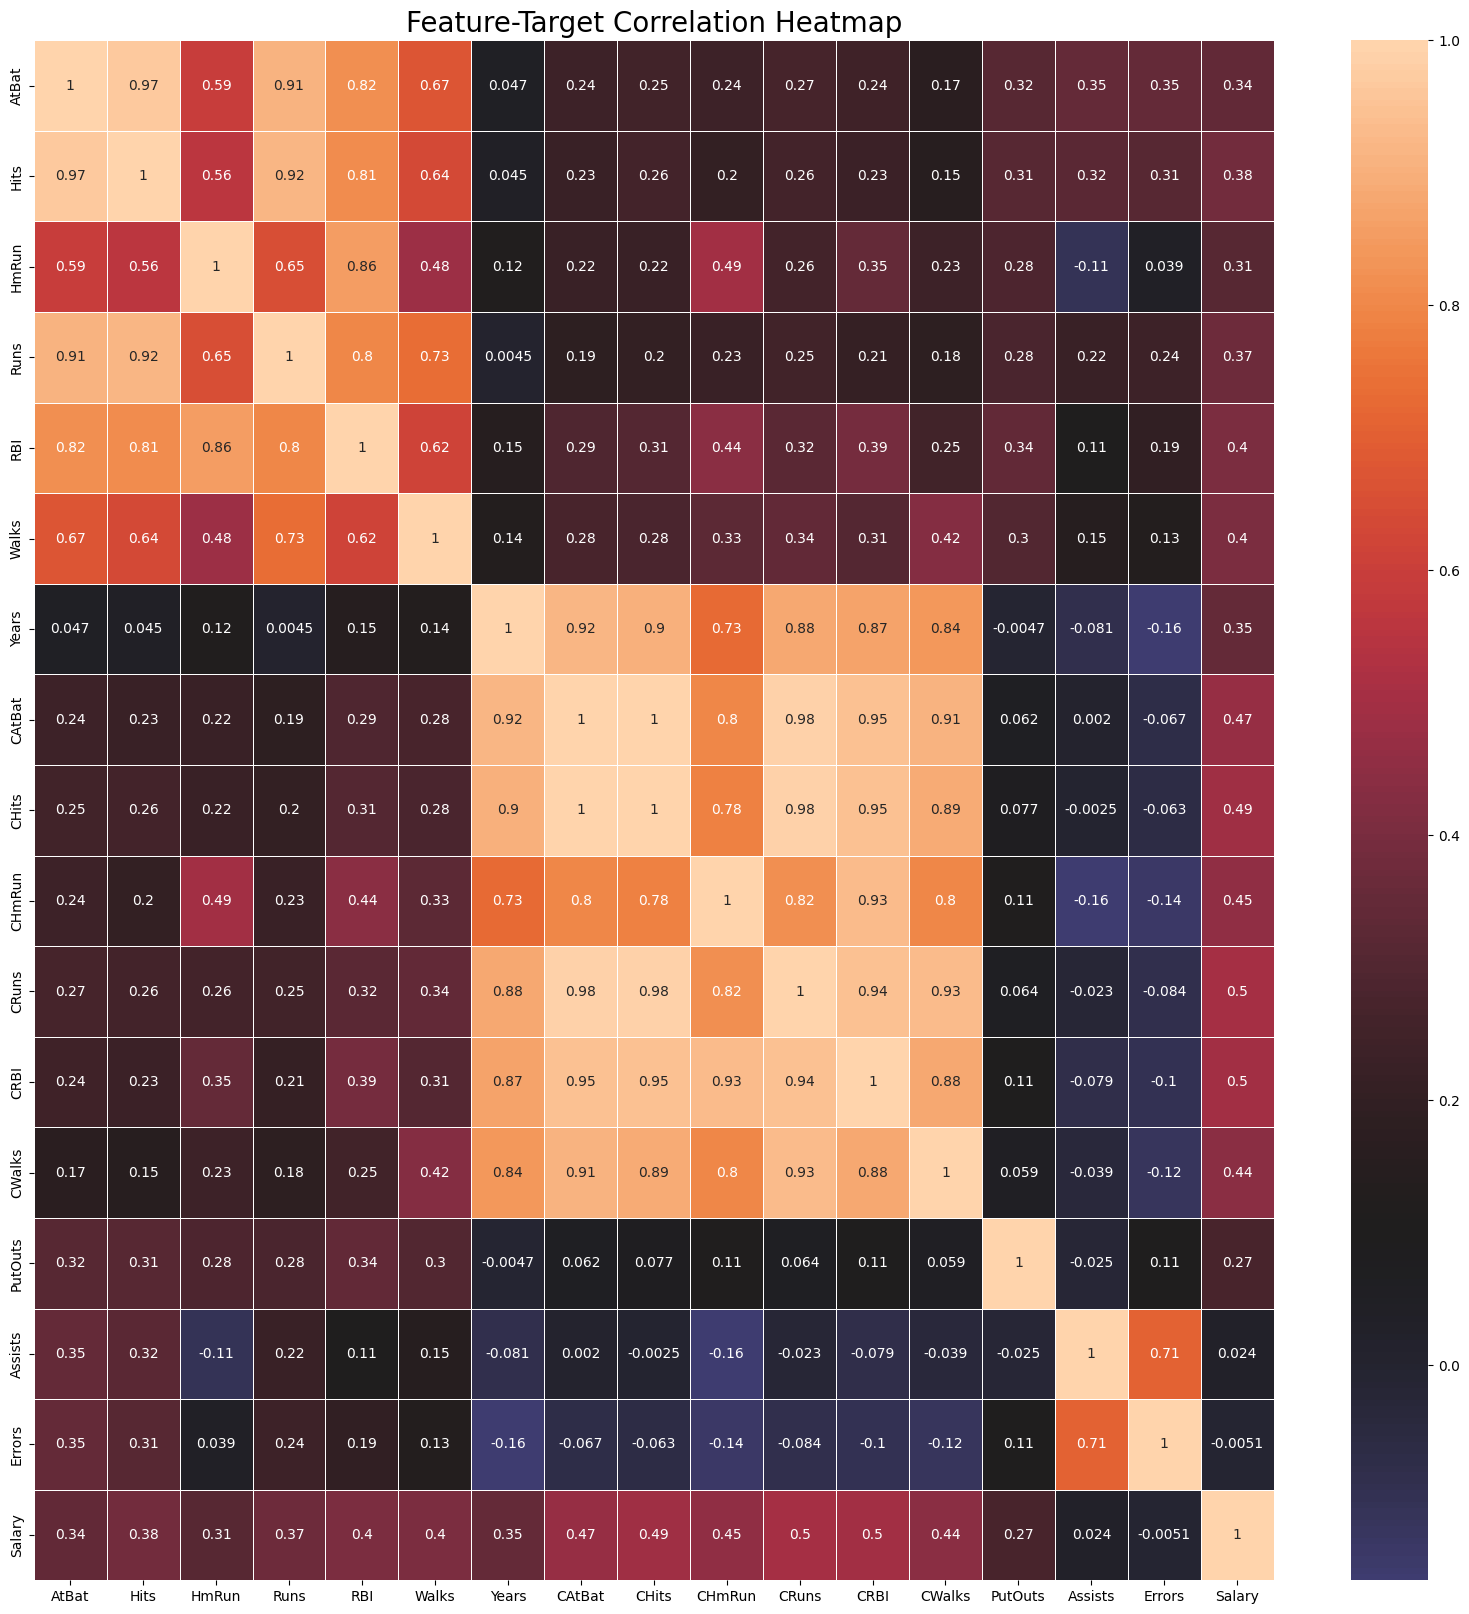

In [23]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.select_dtypes(include=np.number).corr(), linewidths=0.5, annot=True, center = 0.1)
plt.title("Feature-Target Correlation Heatmap", fontsize=20)
plt.show()

### Detecting Outliers

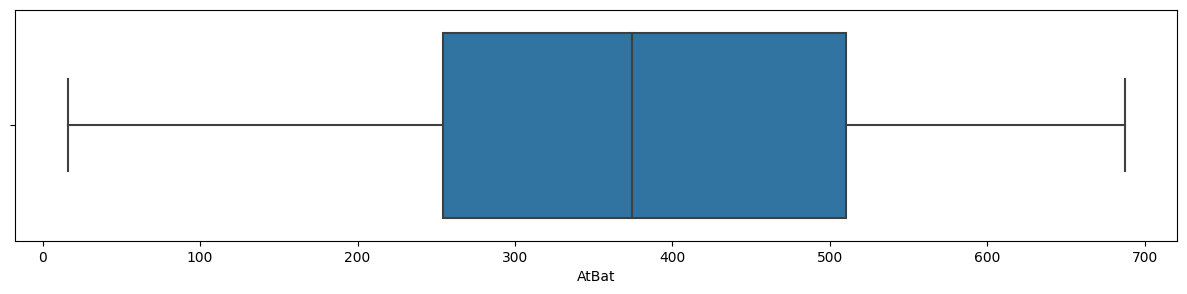

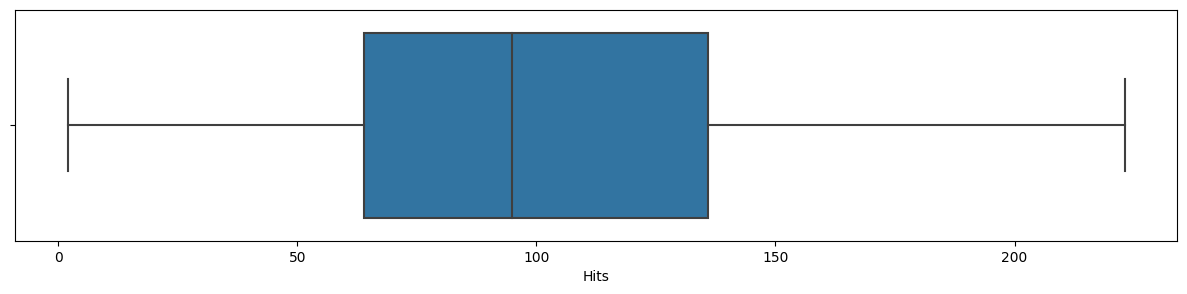

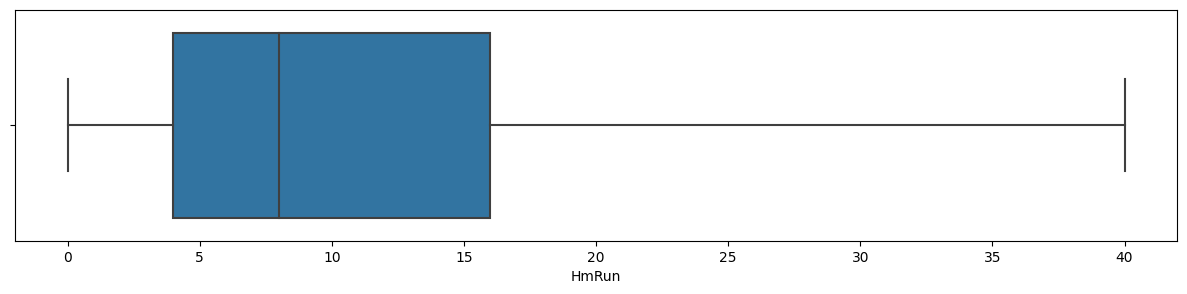

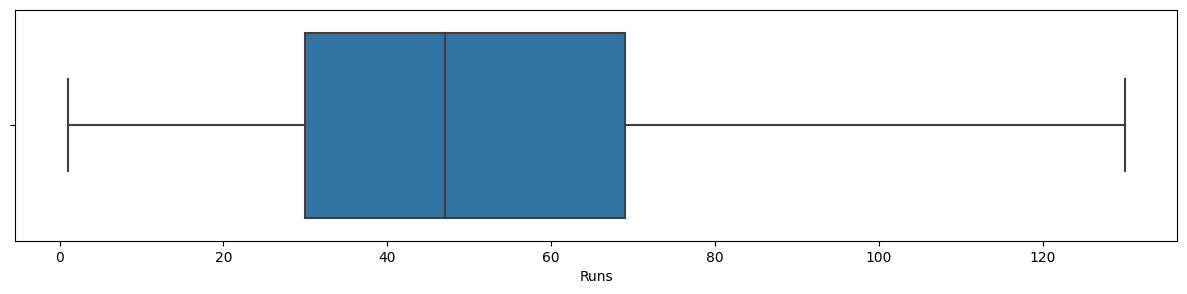

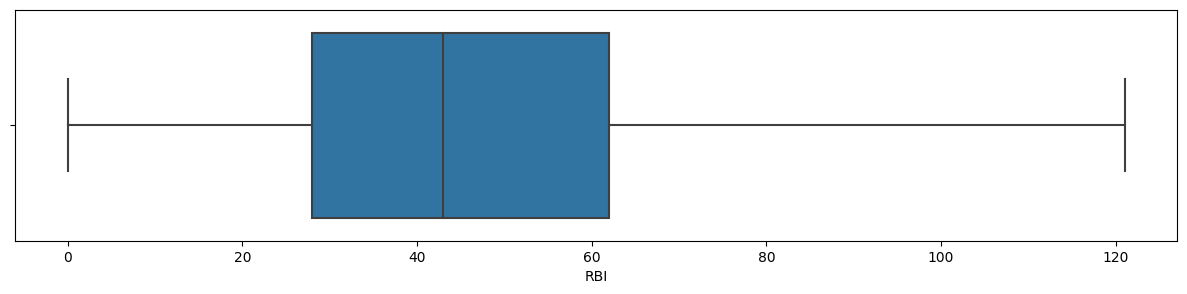

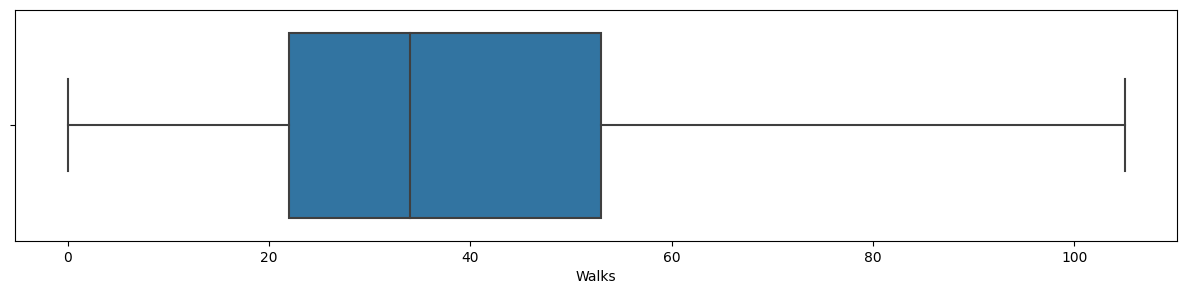

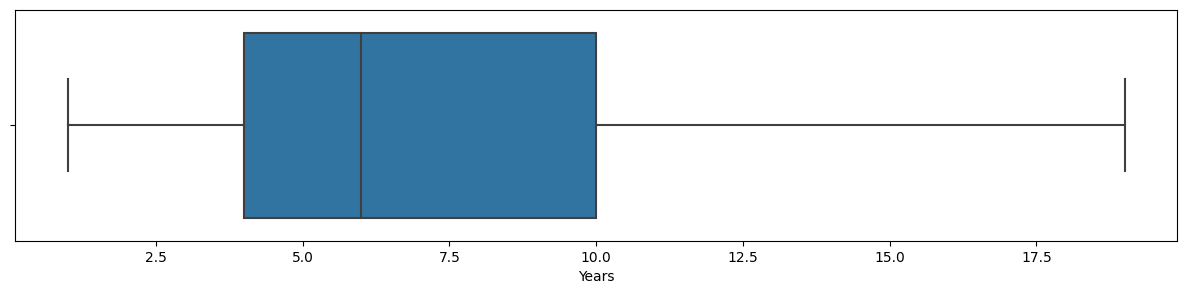

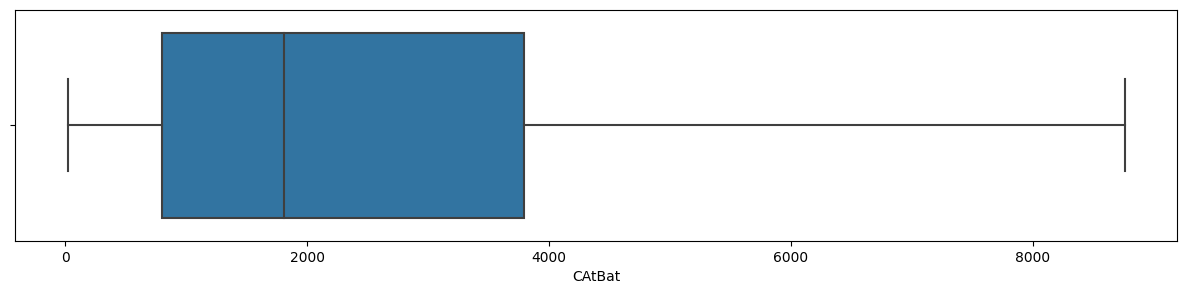

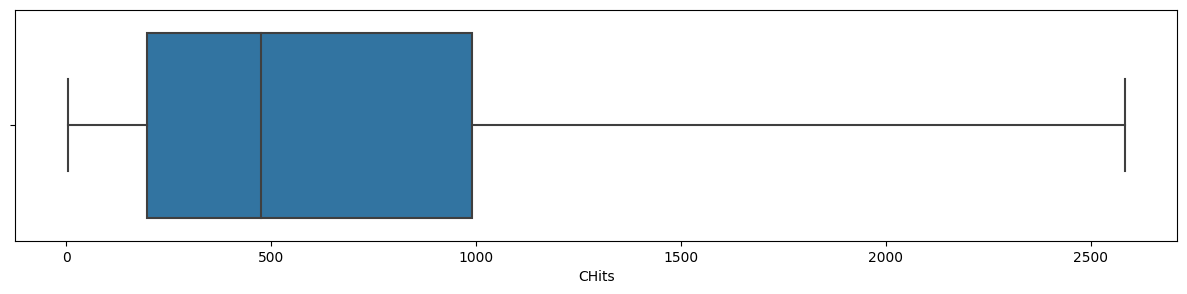

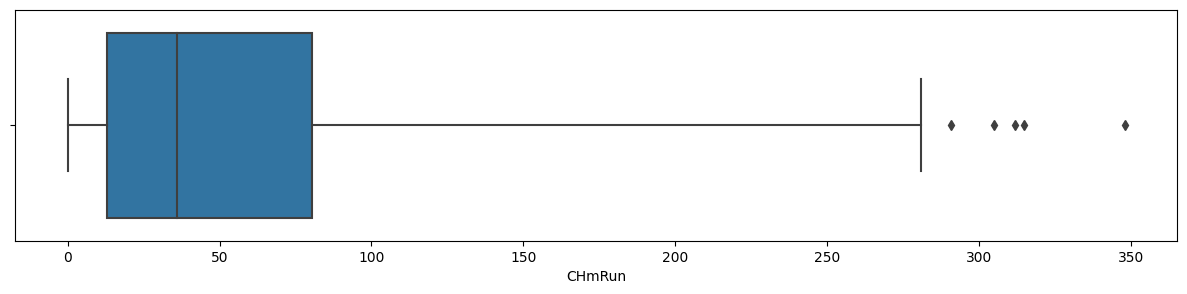

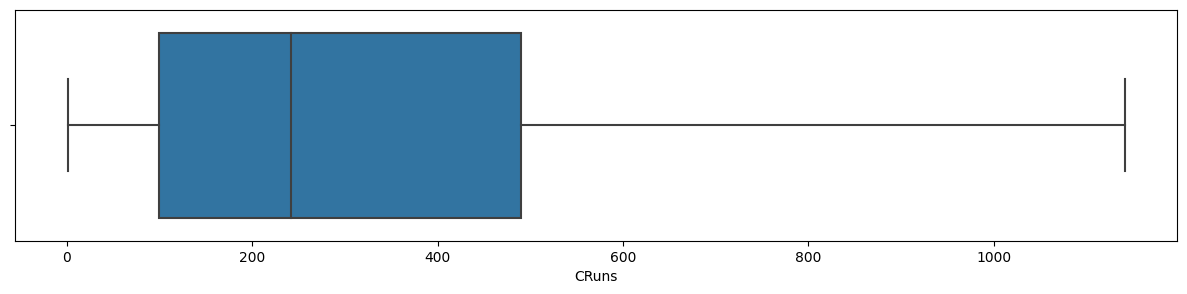

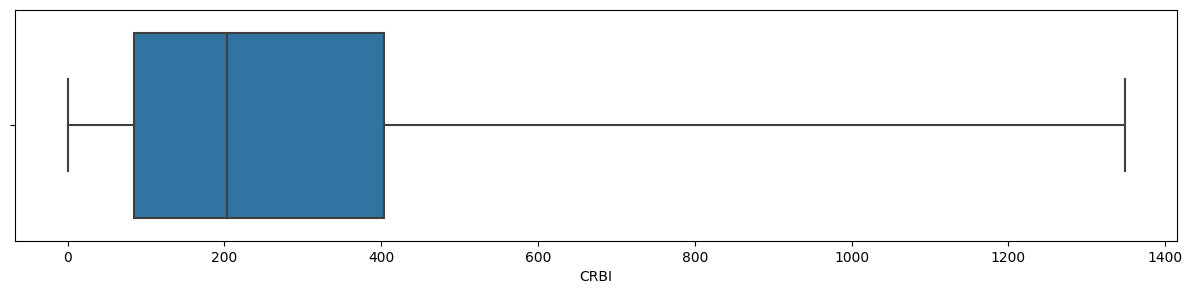

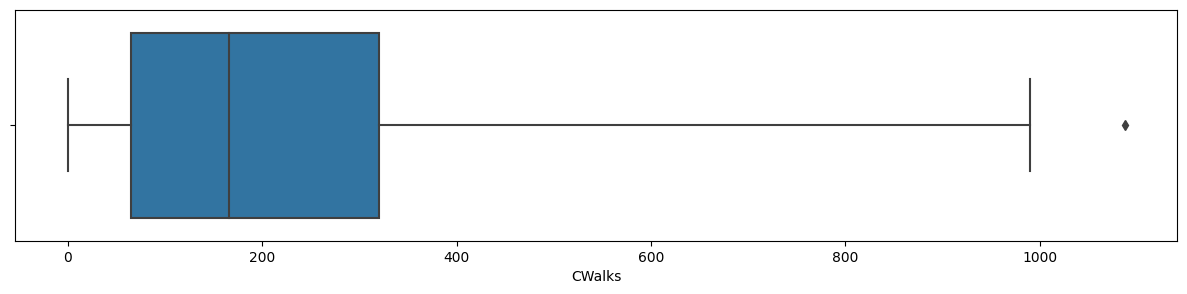

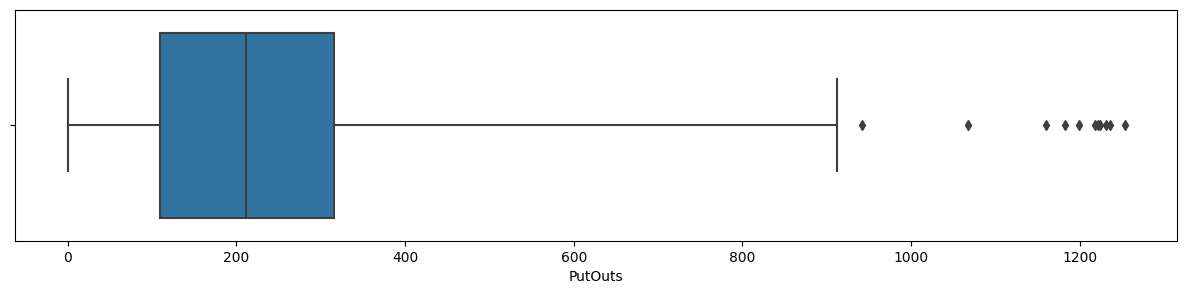

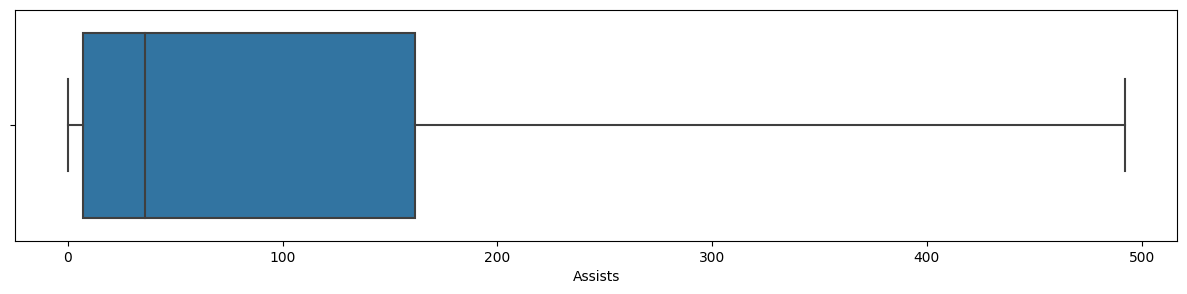

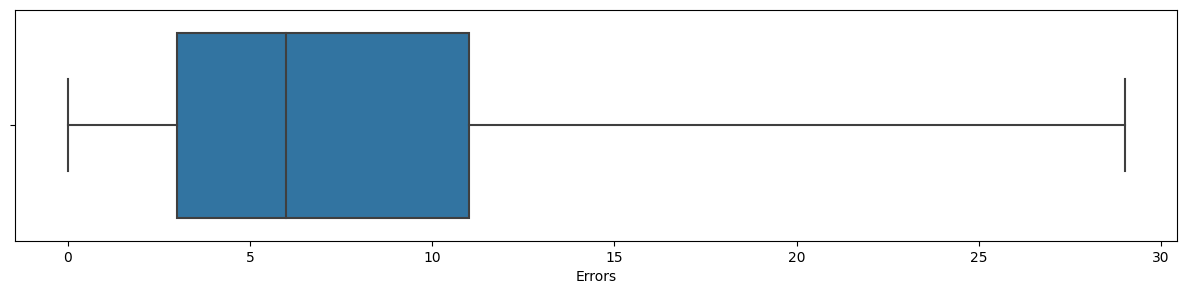

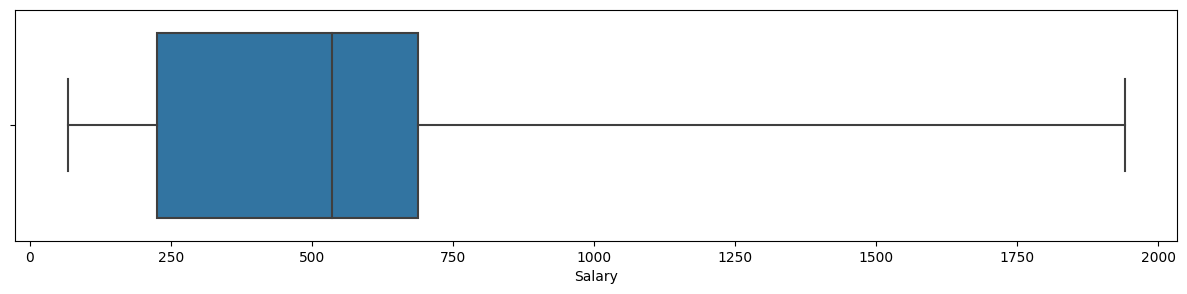

In [26]:
import warnings
warnings.filterwarnings('ignore')
for feature in dataset.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(15,3))
  sns.boxplot(x=feature,data=dataset,whis=3)
  plt.show()

### Deleting Outliers

We delete extreme outliers from the data

In [27]:
print(len(dataset))
for col in dataset.select_dtypes(np.number).columns:
  mean = dataset[col].mean()
  std = dataset[col].std()
  upper_bound = mean + 3.5*std
  lower_bound = mean - 3.5*std
  dataset = dataset[(dataset[col] <= upper_bound) & (dataset[col] >= lower_bound)]
print(len(dataset))

307
289


### Adding Dummies for Categorical Data

In [28]:
dataset = pd.get_dummies(dataset, drop_first=True, columns=["Division"])

### Standardizing the Dataset

In [29]:
for col in dataset.columns:
  if "Salary" != col:
    # standardizing all features except the target
    dataset[col] = (dataset[col] - dataset[col].mean())/dataset[col].std()

### Save Preprocessed Dataset

In [31]:
dataset.to_csv("preprocessed.csv")

# 2. PCA Analysis

## Apply PCA on the cleaned dataset to reduce dimensionality

[99.99995645768296, 2.611340984275019e-05, 1.1383200207879005e-05, 3.2575585170156715e-06, 1.3344476544301985e-06, 7.639753266122625e-07, 4.41225952257585e-07, 1.043033683750499e-07, 7.943390274868317e-08, 3.278802634109207e-08, 1.9456404734340334e-08, 7.127450303136376e-09, 3.391247332153089e-09, 1.3688488535499158e-09, 5.65088713597882e-10, 4.565513127476437e-11, 1.95523973352979e-11, 6.70539093770863e-20]


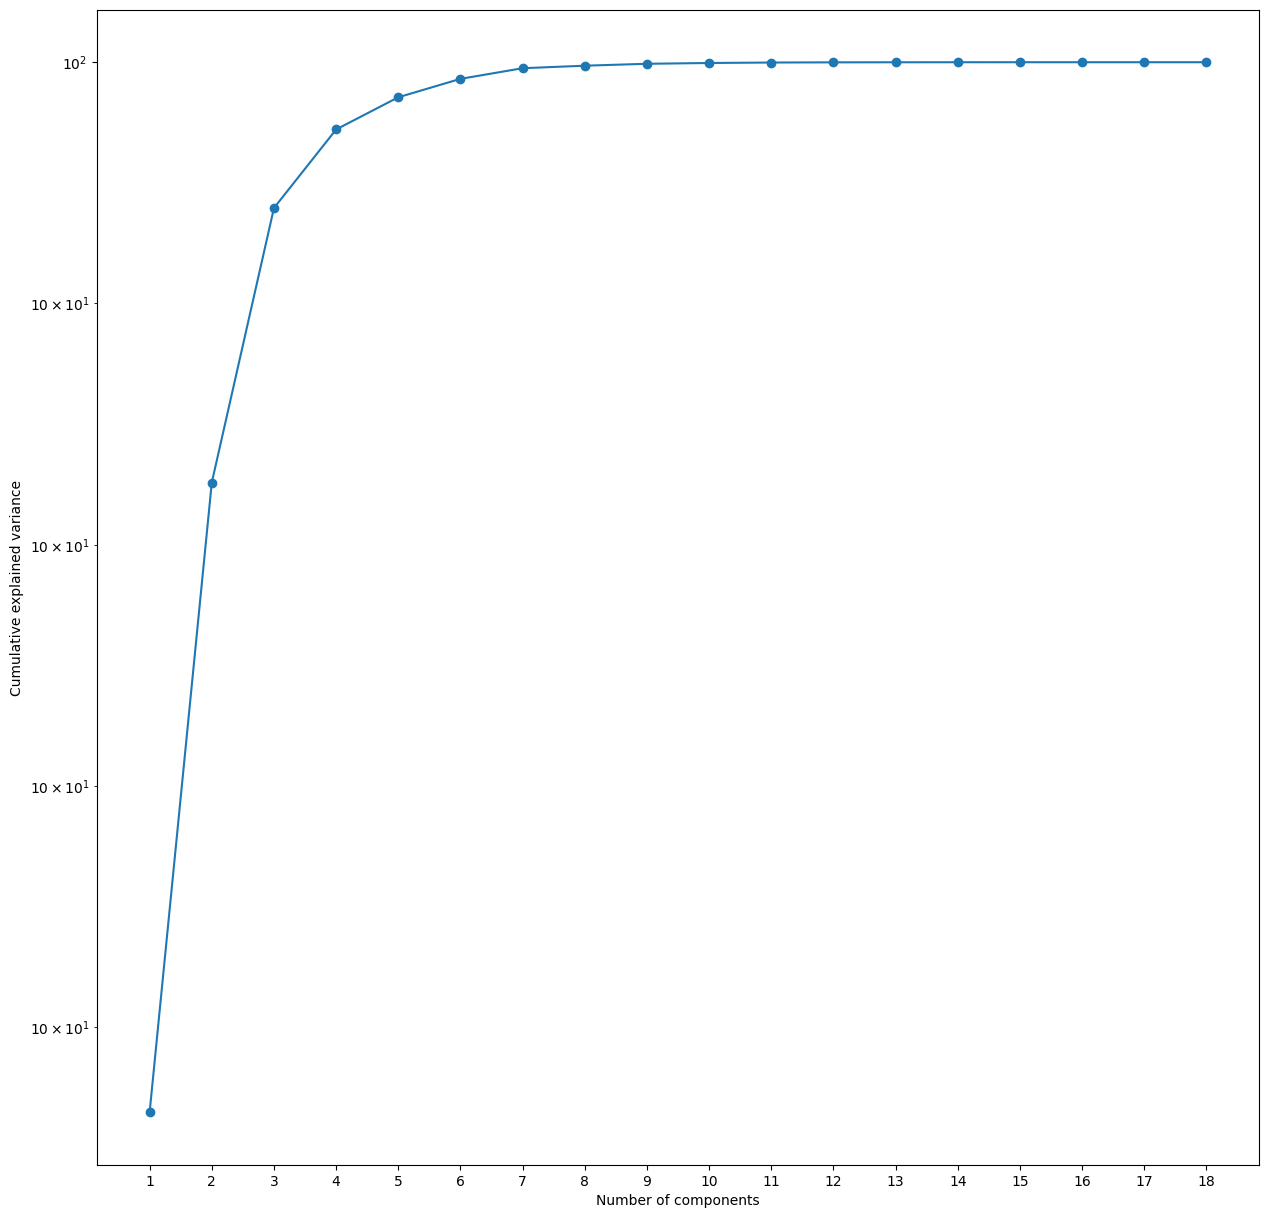

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def getKLargestEigenvectors(dataset: pd.DataFrame, k: int) -> tuple[np.ndarray, np.ndarray]:
  matrix = np.cov(np.cov(dataset.drop(['Salary'], axis=1).to_numpy(), rowvar=False))
  # the values and their corresponding vectors are in ascending order by values
  eig_values, eig_vectors = np.linalg.eigh(matrix)
  # eig_vectors[:, i] represents ith eigenvector
  # return size (for nxn input matrix) is nxk
  return eig_values[:-k-1:-1], eig_vectors[:, :-k-1:-1]
dataset = pd.read_csv("preprocessed.csv")
m = len(dataset.columns)-1
eig_values, eig_vectors = getKLargestEigenvectors(dataset, m)
# plotting the covered variance against the number of PCs
var_tot = np.sum(eig_values)
# Plotting the Variance covered
var_cover = [(i/var_tot)*100 for i in eig_values]
print(var_cover)
plt.figure(figsize=(15, 15))
plt.plot(np.arange(1, m+1), np.cumsum(var_cover), '-o')
plt.xticks(np.arange(1, m+1))
plt.yscale('log')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## Number of Principal Components Required for Efficient Prediction

We observe that 1 Principal Component gives us coverage of more than 99 % of the variance in the data. Thus, 1 component is enough for our models.

# 3. Model Training and MSE/RMSE Calculation

## Split the dataset into training and testing sets

In [ ]:
def test_train_split(X: np.ndarray, Y: np.ndarray, test_size = 0.25, random_state = 0) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
  np.random.seed(random_state)
  # shuffle indices
  indices = np.random.permutation(len(X)).tolist()
  test_size = int(X.shape[0]*test_size)

  # separating test-train indices
  test_indices = indices[:test_size]
  train_indices = indices[test_size:]
  return np.take(X, test_indices, axis = 0), np.take(Y, test_indices, axis = 0), np.take(X, train_indices, axis = 0), np.take(Y, train_indices, axis = 0)

# X_test, Y_test, X_train, Y_train = test_train_split(X, Y)

## Build a Regression Model for each Number of Components and Calculate MSE of each

### Mean Squared Error Function

In [ ]:
def mse(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
  return np.mean((Y_true - Y_pred)**2)

### Regression Model

In [ ]:
def linear_regressor(X: np.ndarray, Y: np.ndarray):
  acc_test = acc_train = 0
  for i in range(5):
    X_test, Y_test, X_train, Y_train = test_train_split(X, Y, 0.2, i)
    W = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ Y_train)
    acc_test += mse(Y_test, np.dot(X_test, W))
    acc_train += mse(Y_train, np.dot(X_train, W))
  return acc_test/5, acc_train/5

### Error vs Number of Principal Components